In [9]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

import seaborn as sns


In [10]:
import pandas as pd 
data_sc= pd.read_excel("C:\\Users\\FIRD\\Desktop\\PROJECT\\data after cleaning and obs.xlsx")

In [11]:
data_sc.columns

Index(['CAPITAL_SOCIAL_OU_PERSONNEL_1_EX_PASSIF_FIAB_',
       'MAX_CA_TOT_PROD_ET_TOT_PROD__VAR_STK_PRD_',
       'IMMOBILISATIONS_CORPORELLES_BRUT_', 'Unnamed: 3',
       'CHIFFRES_D_AFFAIRES_RETENU_', 'CHARGES_NON_COURANTES_RETENU_',
       'IMPOT_SUR_RESULTAT_RETENU_DV_', 'RESULTAT_NON_COURANT_RETENU_',
       'CREDIT_TVA_REPORTABLE_31_12_', 'ID', 'Secteur', 'RESULTAT_FISCAL_BRUT',
       'FRAUDE', 'REGION', 'TYPE_LIASSE_', 'TYPE_DECLARATION_',
       'CREATION_RECENTE', 'MAROCAIN'],
      dtype='object')

# modeling

# note : 
as we saw on the file that conatin the descreption stat ,  we have high multicolinearityy thing so i will need the l1 and l2 penalisation

## REGRESSION

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import LabelEncoder

In [13]:
data_sc=data_sc.drop('ID', axis=1)



### we are going to encode our categorical variables 

In [14]:
# Prétraitement des données
# Encodage des variables catégorielles

label_encoder = LabelEncoder()
data_sc['Secteur'] = label_encoder.fit_transform(data_sc['Secteur'])
data_sc['REGION'] = label_encoder.fit_transform(data_sc['REGION'])

data_sc['TYPE_LIASSE_'] = label_encoder.fit_transform(data_sc['TYPE_LIASSE_'])

data_sc['TYPE_DECLARATION_'] = label_encoder.fit_transform(data_sc['TYPE_DECLARATION_'])
data_sc['CREATION_RECENTE'] = label_encoder.fit_transform(data_sc['CREATION_RECENTE'])


data_sc['RESULTAT_FISCAL_BRUT'] = label_encoder.fit_transform(data_sc['RESULTAT_FISCAL_BRUT'])

In [15]:
data_sc['Secteur'].unique()

array([1, 2, 0, 3])

In [16]:
data_sc['TYPE_LIASSE_'].unique()

array([0, 2, 1])

In [17]:
data_sc['RESULTAT_FISCAL_BRUT'].unique()

array([0, 2, 1])

### Choose the target variable

In [18]:

X = data_sc.drop('FRAUDE', axis=1)
y = data_sc['FRAUDE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## using piplines :
- Pipeline: The use of a pipeline is beneficial as it automates and simplifies the workflow.
It ensures that every time we apply the pipeline, the steps (like scaling) are executed in the correct order without any manual intervention.

- StandardScaler: Standardizing the data ensures that all features have the same scale. This is important for algorithms like Logistic Regression that are sensitive to the scale of the input data.

- Logistic Regression: This is a standard model for classification tasks. It is commonly used when the output variable is categorical, especially for binary classification.



In [29]:
from sklearn.linear_model import LogisticRegression

# create pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# fit model
logit_model =pipe.fit(X_train, y_train)

# predict on train and test
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

# evaluate model
print('Train f1 score: ', f1_score(y_train, y_train_pred))
print('Test f1 score: ', f1_score(y_test, y_test_pred))




Train f1 score:  0.9750306640967233
Test f1 score:  0.9738241308793456


In [30]:
print(classification_report(y_test, y_test_pred))



              precision    recall  f1-score   support

           0       0.80      0.10      0.18       277
           1       0.95      1.00      0.97      4769

    accuracy                           0.95      5046
   macro avg       0.88      0.55      0.58      5046
weighted avg       0.94      0.95      0.93      5046



### Logistic Regression with L1 Regularization:

The model uses L1 regularization (Lasso) to perform feature selection by penalizing the absolute value of the coefficients. The solver used is liblinear, suitable for small datasets or L1 regularization.

L1 Regularization (Lasso) Performance:
Accuracy: 0.9492667459373761
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.10      0.18       277
           1       0.95      1.00      0.97      4769

    accuracy                           0.95      5046
   macro avg       0.88      0.55      0.58      5046
weighted avg       0.94      0.95      0.93      5046

Confusion Matrix:
[[  28  249]
 [   7 4762]]


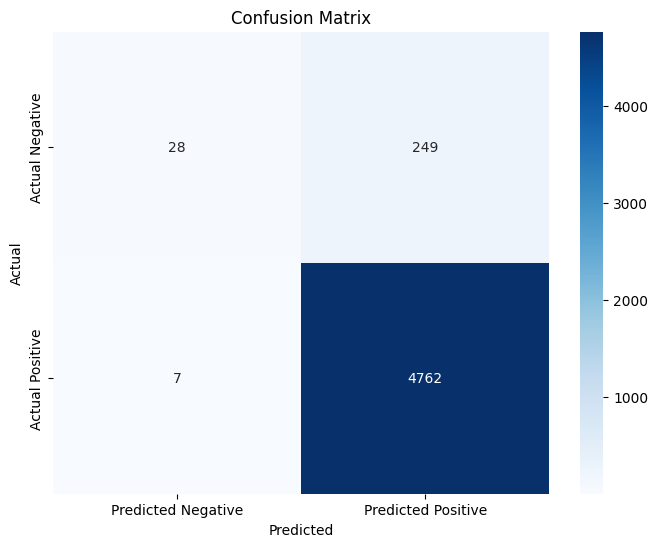

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the logistic regression model with L1 regularization (Lasso)
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000)
logreg_l1.fit(X_train_scaled, y_train)

# Step 3: Make predictions on the test data
y_pred_l1 = logreg_l1.predict(X_test_scaled)

# Step 4: Evaluate the performance of the model
print("L1 Regularization (Lasso) Performance:")

# Accuracy
accuracy = accuracy_score(y_test, y_pred_l1)
print("Accuracy:", accuracy)

# Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test, y_pred_l1)
print("Classification Report:")
print(class_report)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_l1)
print("Confusion Matrix:")
print(conf_matrix)

# Step 5: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


###  Under-sampling

In [34]:
pip install imbalanced-learn



   ---------------------------------------- 0.0/258.3 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/258.3 kB 1.4 MB/s eta 0:00:01
   -------------- ------------------------- 92.2/258.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------- ----- 225.3/258.3 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 258.3/258.3 kB 1.2 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [182]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


### regression with Under-sampling

In [186]:
# Création du pipeline avec sélection des caractéristiques
from sklearn.linear_model import LogisticRegression

# create pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# fit model
pipe.fit(X_train_balanced, y_train_balanced)

# predict on train and test
y_train_pred = pipe.predict(X_train_balanced)
y_test_pred = pipe.predict(X_test)

# evaluate model
print('Train f1 score: ', f1_score(y_train_balanced, y_train_pred))
print('Test f1 score: ', f1_score(y_test, y_test_pred))

Train f1 score:  0.8175511307324984
Test f1 score:  0.8926052332195676


In [188]:
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.17      0.65      0.27       277
           1       0.98      0.82      0.89      4769

    accuracy                           0.81      5046
   macro avg       0.58      0.73      0.58      5046
weighted avg       0.93      0.81      0.86      5046



### we can see that it gives us bad results so lets just work more on the original data 

### Perform cross-validation for the regression model

In [108]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

In [110]:
# Définir la méthode de validation croisée avec stratification

# Calcul des scores de validation croisée
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipe, X_train_balanced, y_train_balanced, cv=cv, scoring='f1')
# Afficher les résultats
print(f"F1 Scores pour chaque partition : {scores}")
print(f"Score F1 moyen : {np.mean(scores):.4f}")
print(f"Score F1 écart-type : {np.std(scores):.4f}")

F1 Scores pour chaque partition : [0.80386847 0.81906238 0.81573822 0.82481467 0.81839439 0.82861635
 0.81786408 0.81487219 0.80870918 0.82352941]
Score F1 moyen : 0.8175
Score F1 écart-type : 0.0070


In [112]:
# create grid
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10]
}

# change the solver 
pipe.set_params(logreg__solver='newton-cholesky', logreg__class_weight={0:1, 1:5})

# create gridsearch
gridsearch = GridSearchCV(pipe, param_grid, cv=5, scoring='f1')

# fit gridsearch
gridsearch.fit(X_train_balanced, y_train_balanced)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(class_weight={0: 1,
                                                                         1: 5},
                                                           max_iter=1000,
                                                           solver='newton-cholesky'))]),
             param_grid={'logreg__C': [0.001, 0.01, 0.1, 1, 10]}, scoring='f1')

In [114]:
# best params
print(gridsearch.best_params_)

# best score
print(gridsearch.best_score_)

{'logreg__C': 10}
0.7268167280612824


In [116]:
y_pred = gridsearch.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.22      0.33       264
           1       0.96      0.99      0.98      4776

    accuracy                           0.95      5040
   macro avg       0.83      0.61      0.65      5040
weighted avg       0.94      0.95      0.94      5040



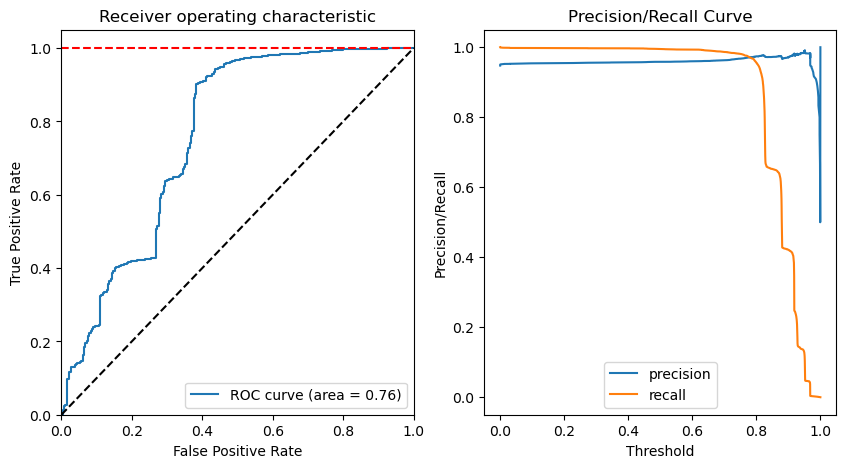

In [118]:
# plot the roc curve

# predict probabilities
y_pred_prob = gridsearch.predict_proba(X_test)[:, 1]

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# calculate auc
roc_auc = auc(fpr, tpr)

# plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# roc curve
ax[0].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].plot([0, 1], [1, 1], 'r--')

ax[0].set_xlim([0.0, 1.0])
ax[0].set_ylim([0.0, 1.05])

ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')

ax[0].set_title('Receiver operating characteristic')
ax[0].legend(loc="lower right")


# precision recall curve
ax[1].plot(thresholds, precision[:-1], label='precision')
ax[1].plot(thresholds, recall[:-1], label='recall')

ax[1].set_xlabel('Threshold')
ax[1].set_ylabel('Precision/Recall')

ax[1].set_title('Precision/Recall Curve')
ax[1].legend(loc="lower center")

plt.show()

In [153]:
# predict on test with the threshold of 0.4
y_pred = (y_pred_prob > 0.8).astype(int)

# evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.20      0.30       264
           1       0.96      0.99      0.97      4776

    accuracy                           0.95      5040
   macro avg       0.79      0.60      0.64      5040
weighted avg       0.94      0.95      0.94      5040



## knn

In [124]:
from sklearn.neighbors import KNeighborsClassifier

# create pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# fit model
pipe.fit(X_train_balanced, y_train_balanced)

# predict on train and test
y_train_pred = pipe.predict(X_train_balanced)
y_test_pred = pipe.predict(X_test)

# evaluate model
print('Train f1 score: ', f1_score(y_train_balanced, y_train_pred))
print('Test f1 score: ', f1_score(y_test, y_test_pred))

Train f1 score:  0.9302653204977694
Test f1 score:  0.9169546315906811


In [126]:
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.22      0.69      0.33       264
           1       0.98      0.86      0.92      4776

    accuracy                           0.85      5040
   macro avg       0.60      0.78      0.62      5040
weighted avg       0.94      0.85      0.89      5040



## Support Vector Classifier


In [129]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

# create pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', SGDClassifier(class_weight={0: 4, 1: 1}))  # Correct class weights
])

# fit model
pipe.fit(X_train_balanced, y_train_balanced)

# cross validation
scores = cross_val_score(pipe, X_train_balanced, y_train_balanced, cv=5, scoring='f1')

# print scores
print(scores)

# print mean score
print('Average F1 score: {:.2f}'.format(scores.mean()))


[0.33285199 0.38382454 0.07589478 0.15744157 0.38466899]
Average F1 score: 0.27


In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.25      0.36       264
           1       0.96      0.99      0.98      4776

    accuracy                           0.95      5040
   macro avg       0.82      0.62      0.67      5040
weighted avg       0.94      0.95      0.94      5040



In [133]:
# Check the unique values in the predictions
print(np.unique(y_test_pred))


[0 1]


In [155]:
from sklearn.metrics import classification_report

# Print the classification report with zero_division handling
print(classification_report(y_test, y_test_pred, zero_division=1))


              precision    recall  f1-score   support

           0       0.50      0.03      0.06       264
           1       0.95      1.00      0.97      4776

    accuracy                           0.95      5040
   macro avg       0.72      0.52      0.52      5040
weighted avg       0.93      0.95      0.93      5040



In [137]:
param_grid = {
    'sgd__alpha': [0.001, 0.01, 0.1, 1, 10],
    'sgd__penalty': ['l1', 'l2']
}

# instantiate grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='recall')

# fit the grid
grid.fit(X_train_balanced, y_train_balanced)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('sgd',
                                        SGDClassifier(class_weight={0: 4,
                                                                    1: 1}))]),
             param_grid={'sgd__alpha': [0.001, 0.01, 0.1, 1, 10],
                         'sgd__penalty': ['l1', 'l2']},
             scoring='recall')

In [109]:
# print best parameters and score
print(grid.best_score_)
print(grid.best_params_)

1.0
{'sgd__alpha': 1, 'sgd__penalty': 'l1'}


In [111]:
# predict on test
pipe = grid.best_estimator_
y_pred = pipe.predict(X_test)

# evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       239
           1       0.94      1.00      0.97      3725

    accuracy                           0.94      3964
   macro avg       0.47      0.50      0.48      3964
weighted avg       0.88      0.94      0.91      3964



C:\Users\FIRD\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\FIRD\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\FIRD\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## decsion trees

In [139]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier

# create the model
dt = DecisionTreeClassifier(max_depth=3, class_weight={0:1, 1:5})

# fit the model
dt.fit(X_train, y_train)

# predict on train and test
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# evaluate model
print('Train f1 score: ', f1_score(y_train, y_train_pred))
print('Test f1 score: ', f1_score(y_test, y_test_pred))

Train f1 score:  0.9734652771696296
Test f1 score:  0.9730557256582976


In [141]:
# parameters
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_weight_fraction_leaf': [0, 0.1, 0.2, 0.3]
}

# instantiate grid search
grid = GridSearchCV(dt, param_grid, cv=5, scoring='f1')

# fit the grid
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 5},
                                              max_depth=3),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_weight_fraction_leaf': [0, 0.1, 0.2, 0.3]},
             scoring='f1')

In [143]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.25      0.36       264
           1       0.96      0.99      0.98      4776

    accuracy                           0.95      5040
   macro avg       0.82      0.62      0.67      5040
weighted avg       0.94      0.95      0.94      5040



In [145]:
# print best parameters and score
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.974441032465141
{'max_depth': 7, 'min_weight_fraction_leaf': 0}
DecisionTreeClassifier(class_weight={0: 1, 1: 5}, max_depth=7,
                       min_weight_fraction_leaf=0)


In [147]:
dt = grid.best_estimator_

# predict on test
y_pred = dt.predict(X_test)
y_pred_prob = dt.predict_proba(X_test)[:, 1]

In [149]:
# evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.15      0.24       264
           1       0.95      0.99      0.97      4776

    accuracy                           0.95      5040
   macro avg       0.78      0.57      0.61      5040
weighted avg       0.94      0.95      0.94      5040



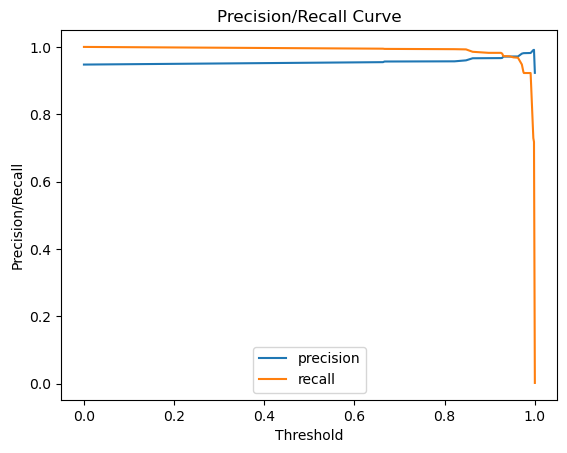

In [151]:
# get the scores for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# plot
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')

plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.title('Precision/Recall Curve')
plt.legend(loc="lower center")

plt.show()

In [157]:
#Random Forests
from sklearn.ensemble import RandomForestClassifier

# create the model
rf = RandomForestClassifier(class_weight={0:1, 1:5})

# fit the model
rf.fit(X_train_balanced, y_train_balanced)

# predict on train and test
y_train_pred = rf.predict(X_train_balanced)
y_test_pred = rf.predict(X_test)

# evaluate model
print('Train f1 score: ', f1_score(y_train_balanced, y_train_pred))
print('Test f1 score: ', f1_score(y_test, y_test_pred))


Train f1 score:  1.0
Test f1 score:  0.9530561821892792


In [157]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {0: 1, 1: 5},
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [159]:
rf = RandomForestClassifier(class_weight={0:1, 1:5}, max_features='sqrt', max_samples=0.5, max_depth=8)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train_balanced)
y_test_pred = rf.predict(X_test)

print('Train f1 score: ', f1_score(y_train_balanced, y_train_pred))
print('Test f1 score: ', f1_score(y_test, y_test_pred))

Train f1 score:  0.7335027894232992
Test f1 score:  0.9764911200082127


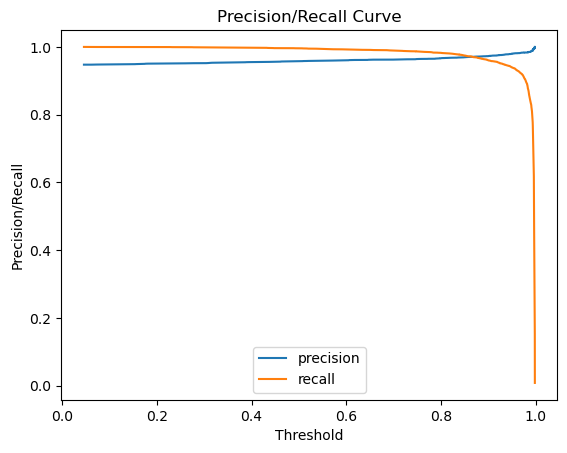

In [176]:
y_pred = y_test_pred
y_pred_prob = rf.predict_proba(X_test)[:, 1]
# plot the precision recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')

plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.title('Precision/Recall Curve')
plt.legend(loc="lower center")

plt.show()

In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.21      0.32       264
           1       0.96      1.00      0.98      4776

    accuracy                           0.95      5040
   macro avg       0.85      0.60      0.65      5040
weighted avg       0.95      0.95      0.94      5040

